In [1]:
#%load_ext Cython
import sympy as sp
import numpy as np
import numpy.linalg as npla
sp.init_printing()

In [2]:
k1, k2 = sp.symbols('k_1, k_2')

In [3]:
M = sp.Matrix([[0,                                 2,                2,                sp.exp(sp.I*k2), sp.exp(sp.I*k1), sp.exp(sp.I*k1)+sp.exp(sp.I*k2)], 
               [2,                                 0,                2,                sp.exp(sp.I*k2), 2,               sp.exp(sp.I*k2)], 
               [2,                                 2,                0,                2,               sp.exp(sp.I*k1), sp.exp(sp.I*k1)], 
               [sp.exp(-sp.I*k2),                  sp.exp(-sp.I*k2), 2,                0,               2,               2],
               [sp.exp(-sp.I*k1),                  2,                sp.exp(-sp.I*k1), 2,               0,               2],
               [sp.exp(-sp.I*k1)+sp.exp(-sp.I*k2), sp.exp(-sp.I*k2), sp.exp(-sp.I*k1), 2,               2,               0]])

In [4]:
#l = sp.symbols('l')
#charmatrix = sp.Matrix([[-l,                                 2,                2,                sp.exp(sp.I*k2), sp.exp(sp.I*k1), sp.exp(sp.I*k1)+sp.exp(sp.I*k2)], 
#                        [2,                                 -l,                2,                sp.exp(sp.I*k2), 2,               sp.exp(sp.I*k2)], 
#                        [2,                                 2,                -l,                2,               sp.exp(sp.I*k1), sp.exp(sp.I*k1)], 
#                        [sp.exp(-sp.I*k2),                  sp.exp(-sp.I*k2), 2,                -l,               2,               2],
#                        [sp.exp(-sp.I*k1),                  2,                sp.exp(-sp.I*k1), 2,               -l,               2],
#                        [sp.exp(-sp.I*k1)+sp.exp(-sp.I*k2), sp.exp(-sp.I*k2), sp.exp(-sp.I*k1), 2,               2,               -l]])

#characteristic_polynomial = charmatrix.det()
#characteristic_polynomial

In [5]:
M0 = M.subs([(k1, 0), (k2, 0)])
M0_diag = M0.eigenvals()
print("k_1 = k_2 = 0: Eigenvalues:", M0_diag)

Mpi = M.subs([(k1, sp.pi), (k2, sp.pi)])
Mpi_diag = Mpi.eigenvals()
print("k_1 = k_2 = π: Eigenvalues:", Mpi_diag)

M_minus_pi = M.subs([(k1, -sp.pi), (k2, -sp.pi)])
M_minus_pi_diag = M_minus_pi.eigenvals()
print("k_1 = k_2 = -π: Eigenvalues:", M_minus_pi_diag)

k_1 = k_2 = 0: Eigenvalues: {8: 1, -1: 2, -3: 2, 0: 1}
k_1 = k_2 = π: Eigenvalues: {1: 1, -5: 1, 3/2 - sqrt(73)/2: 1, 3/2 + sqrt(73)/2: 1, 1/2 - sqrt(33)/2: 1, 1/2 + sqrt(33)/2: 1}
k_1 = k_2 = -π: Eigenvalues: {1: 1, -5: 1, 3/2 - sqrt(73)/2: 1, 3/2 + sqrt(73)/2: 1, 1/2 - sqrt(33)/2: 1, 1/2 + sqrt(33)/2: 1}


In [6]:
matrix_function = sp.lambdify((k1, k2), M, modules='numpy')

dom = np.linspace(0, 7, 1000)
x, y = np.meshgrid(dom, dom)

result = np.array([[npla.eigvalsh(matrix_function(x, y)) for y in dom] for x in dom])

result_reshaped = np.transpose(result, [2, 0, 1])

39.2 s ± 382 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

In [7]:
print(npla.eigvalsh(matrix_function(0, 0)))

[-3.00000000e+00 -3.00000000e+00 -1.00000000e+00 -1.00000000e+00
 -2.08361712e-16  8.00000000e+00]


In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import FuncFormatter, MultipleLocator

In [9]:
x, y = np.meshgrid(dom, dom)

In [10]:
min_indices = [divmod(result_reshaped[i].argmin(), result_reshaped.shape[1]) for i in range(6)]
max_indices = [divmod(result_reshaped[i].argmax(), result_reshaped.shape[1]) for i in range(6)]

for i in range(6):
    print('Minimum of eigenvalue {i} is located at: k_1 ={x_koor:.2f}τ, k_2 = {y_koor:.2f}τ'
          .format(i=i, x_koor = dom[min_indices[i][0]]/(2*np.pi), y_koor = dom[min_indices[i][1]]/(2*np.pi)))
    print('Maximum of eigenvalue {i} is located at: k_1 ={x_koor:.2f}τ, k_2 = {y_koor:.2f}τ\n'
          .format(i=i, x_koor = dom[max_indices[i][0]]/(2*np.pi), y_koor = dom[max_indices[i][1]]/(2*np.pi)))

Minimum of eigenvalue 0 is located at: k_1 =0.50τ, k_2 = 0.50τ
Maximum of eigenvalue 0 is located at: k_1 =0.00τ, k_2 = 0.00τ

Minimum of eigenvalue 1 is located at: k_1 =0.00τ, k_2 = 0.00τ
Maximum of eigenvalue 1 is located at: k_1 =0.50τ, k_2 = 0.50τ

Minimum of eigenvalue 2 is located at: k_1 =0.50τ, k_2 = 0.50τ
Maximum of eigenvalue 2 is located at: k_1 =0.00τ, k_2 = 0.00τ

Minimum of eigenvalue 3 is located at: k_1 =0.00τ, k_2 = 0.00τ
Maximum of eigenvalue 3 is located at: k_1 =0.50τ, k_2 = 0.50τ

Minimum of eigenvalue 4 is located at: k_1 =0.00τ, k_2 = 0.00τ
Maximum of eigenvalue 4 is located at: k_1 =0.34τ, k_2 = 0.66τ

Minimum of eigenvalue 5 is located at: k_1 =0.34τ, k_2 = 0.66τ
Maximum of eigenvalue 5 is located at: k_1 =0.00τ, k_2 = 0.00τ



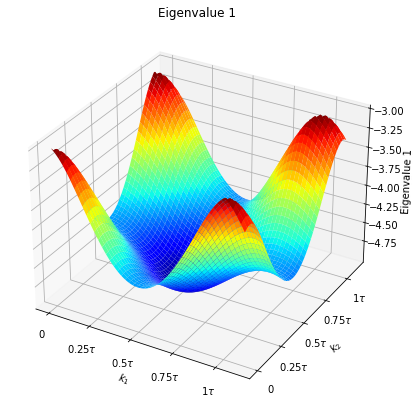

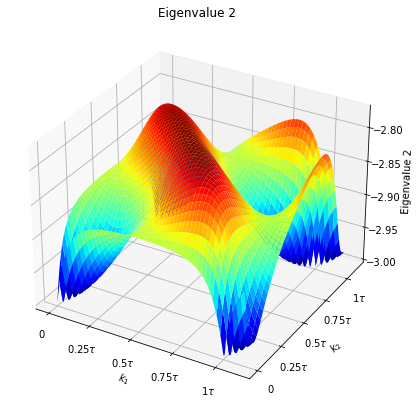

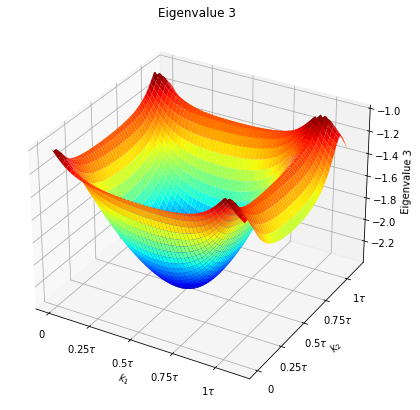

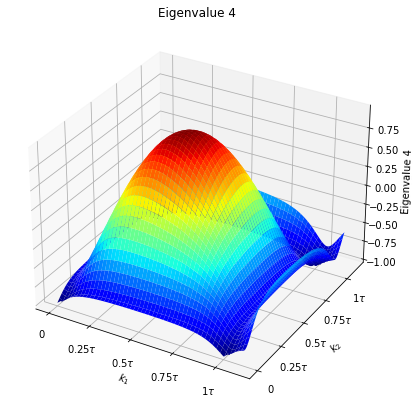

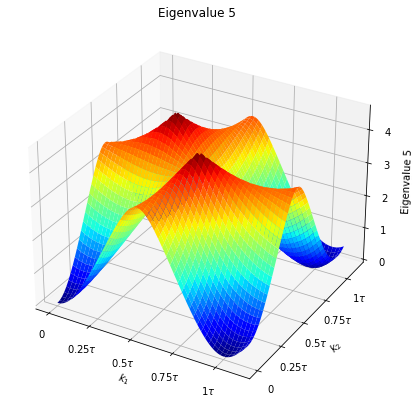

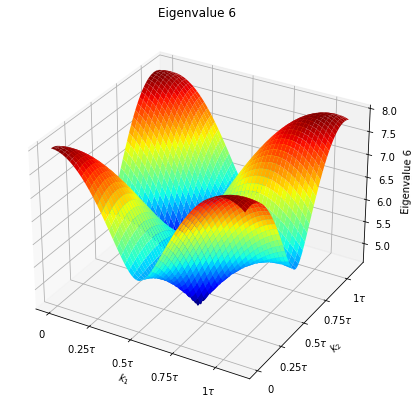

In [14]:
for i in range(6):

    title = "Eigenvalue "+str(i+1)

    
    fig = plt.figure(figsize=(8,7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, result_reshaped[i], cmap=cm.jet)
    #ax.plot(0, 0, 0)
    ax.set_title(title)
    ax.set_xlabel(r'$k_1$')
    ax.set_ylabel(r'$k_2$')
    ax.set_zlabel(title)

    ax.xaxis.set_major_formatter(FuncFormatter(
       lambda val,pos: r'{:.3g}$\tau$'.format(val/(2*np.pi)) if val !=0 else '0'
    ))
    ax.xaxis.set_major_locator(MultipleLocator(base=np.pi/2))

    ax.yaxis.set_major_formatter(FuncFormatter(
       lambda val,pos: r'{:.3g}$\tau$'.format(val/(2*np.pi)) if val !=0 else '0'
    ))
    ax.yaxis.set_major_locator(MultipleLocator(base=np.pi/2))

    plt.savefig(title+".svg", dpi=300)

    plt.show()

In [12]:
for i in range(6):
    for j in range (5-i):
        difference = result_reshaped[i]-result_reshaped[i+j+1]
        print('Compare {i} and {k}:  Average difference: {avg_diff:.3f} +- {diff_std:.3f}'.format(i=i, k=i+j+1, avg_diff = np.average(difference), diff_std = np.std(difference)))



Compare 0 and 1:  Average difference: -1.361 +- 0.532
Compare 0 and 2:  Average difference: -2.599 +- 0.284
Compare 0 and 3:  Average difference: -3.976 +- 0.965
Compare 0 and 4:  Average difference: -6.625 +- 1.666
Compare 0 and 5:  Average difference: -10.761 +- 0.448
Compare 1 and 2:  Average difference: -1.238 +- 0.395
Compare 1 and 3:  Average difference: -2.614 +- 0.504
Compare 1 and 4:  Average difference: -5.263 +- 1.159
Compare 1 and 5:  Average difference: -9.400 +- 0.888
Compare 2 and 3:  Average difference: -1.376 +- 0.888
Compare 2 and 4:  Average difference: -4.025 +- 1.455
Compare 2 and 5:  Average difference: -8.162 +- 0.665
Compare 3 and 4:  Average difference: -2.649 +- 0.995
Compare 3 and 5:  Average difference: -6.785 +- 1.235
Compare 4 and 5:  Average difference: -4.137 +- 2.040
